In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
%matplotlib inline

In [196]:
class Grid:
    
    def __init__(self, **kwargs):
        self.updates=0
        if 'arr' in kwargs:
            self.grid=kwargs['arr']
        elif 'm' in kwargs and 'n' in kwargs:
            self.grid=np.zeros((kwargs['m'], kwargs['n']))
        elif 'm' in kwargs and not 'n' in kwargs:
            self.grid=np.zeros((kwargs['m'], kwargs['m']))
        if 'locations' in kwargs:
            indexList=kwargs['locations']
            for indices in indexList:
                self.grid[indices[0],indices[1]]=1   
        self.shape=self.grid.shape
        self.points=[Point(item, self.shape) for item in list(zip(np.where(self.grid>0)[0], np.where(self.grid>0)[1]))]
        for point in self.points:
            point.setNeighbours()
    
    
    def getPoints(self):
        return self.points
    
    def removePoint(self, point):
        self.points.remove(point)
        return
    
    def updateGrid(self):
        self.grid=np.zeros(self.grid.shape)
        for point in self.points:
            ind=point.getindex()
            point.setNeighbours()
            self.grid[ind[0],ind[1]]=1
        return
    
    
    def switch(self):
        self.grid=np.ones(self.grid.shape)
        for indices in self.points:
            self.grid[indices[0],indices[1]]=0
        self.points=[]
        self.points=list(zip(np.where(self.grid>0)[0], np.where(self.grid>0)[1]))
    
    def moveDown(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[((item[0]+1)%self.grid.shape[0], item[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def moveUp(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[((item[0]-1)%self.grid.shape[0], item[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def moveLeft(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[(item[0], (item[1]-1)%self.grid.shape[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def getGrid(self):
        return self.grid
    
    def getPoints(self):
        return self.points
    
    def randomize(self):
        self.updates+=1
        self.grid=np.random.randint(2, size=self.shape)
    
    def view(self):
        plt.imshow(self.grid)
        plt.show()
        
    def updates(self):
        return self.updates
    

In [198]:
class Point:
    
    def __init__(self, location, gridSize):
        self.location=location
        self.gridSize=gridSize
        self.neighbours=[] #Will be L, R, U, D 
        
    def __eq__(self, other):
        if isinstance(other, Point):
            return self.location == other.location and self.gridSize==other.gridSize
        return False
    
    def __repr__(self):
        return '('+str(self.location[0])+','+str(self.location[1])+')'
    
    def setNeighbours(self):
        pos=[self.PointUp(), self.PointDown(), self.PointLeft(), self.PointRight()]
        self.neighbours=[item for item in pos if item!= None]
        return

    @staticmethod
    def inGrid(location, gridShape):
        return location[0] in range(gridShape[0]) and location[1] in range(gridShape[1])
    
    @staticmethod
    def createPointList(locationList, gridSize):
        ans=[]
        for loc in locationList:
            point=Point(loc, gridSize)
            point.setNeighbours()
            ans+=[point]
        return ans
        
    
    def PointUp(self):
        x, y = self.getIndex()
        up=(x-1,y)
        if Point.inGrid(up, self.getGridSize()):
            return Point(up,self.getGridSize() )
        return None
    
    def PointDown(self):
        x, y = self.getIndex()
        down=(x+1,y)
        if Point.inGrid(down, self.getGridSize()):
            return Point(down,self.getGridSize())
        return None
    
    def PointLeft(self):
        x, y = self.getIndex()
        left=(x,y-1)
        if Point.inGrid(left, self.getGridSize()):
            return Point(left,self.getGridSize())
        return None
    
    def PointRight(self):
        x, y = self.getIndex()
        right=(x,y+1)
        if Point.inGrid(right, self.getGridSize()):
            return Point(right,self.getGridSize())
        return None
    
    def getIndex(self):
        return [self.location[0], self.location[1]]
    
    def getNeighours(self):
        return self.neighbours
    
    def getGridSize(self):
        return self.gridSize

In [184]:
p1=Point((0,1), (2,2))
p2=Point((9,3), (12,12))
p3=Point((1,1), (2,2))

In [193]:
p1.setNeighbours()
p1.getNeighours()

[(1,1), (0,0)]

In [148]:
p1.getGridSize()== p3.getGridSize(), p1.getIndex()==p3.getIndex()

(True, True)

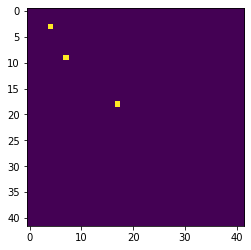

In [191]:
g=Grid(m=42, locations=[(3,4), (9,7), (18,17)])
g.view()

In [192]:
g.getPoints()

[(3,4), (9,7), (18,17)]

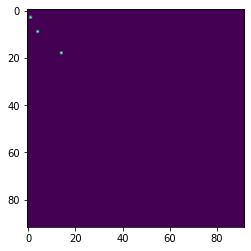

In [71]:
g.moveLeft()
g.view()

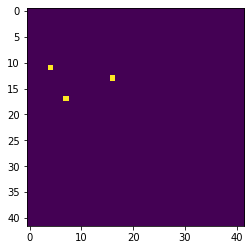

In [76]:
fig = plt.figure()
g=Grid(m=42, locations=[(3,4), (9,7), (5,16)])

im=plt.imshow(np.random.random(g.getGrid().shape),interpolation='none')

def animate(step):
    g.moveDown()
    im.set_array(g.getGrid())
    return [im]

def init():
    g.randomize()
    im.set_data(g.getGrid())
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=300,
                              interval=150, blit=True)

HTML(ani.to_html5_video())

# Others' Work

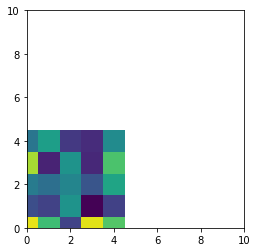

In [143]:
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
#line, = ax.plot([], [], lw=2)
a=np.random.random((5,5))
im=plt.imshow(a,interpolation='none')
# initialization function: plot the background of each frame
def init():
    im.set_data(np.random.random((5,5)))
    return [im]

# animation function.  This is called sequentially
def animate(i):
    a=im.get_array()
    a=a*np.exp(-0.001*i)    # exponential decay of the values
    im.set_array(a)
    return [im]

anim=matplotlib.animation.FuncAnimation(fig, animate, frames=41,
                    init_func=init, blit=True)
plt.show()

In [125]:
# g=Grid(m=19)
# g.randomize()
# count=0
# plt.ion()
# while count<3:
#     g.view()
#     g.randomize()
#     plt.show()
#     count+=1
#     plt.close()
#     time.sleep(.001)
    
# plt.ioff()

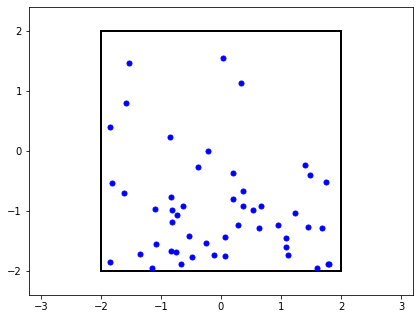

In [145]:
import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

class ParticleBox:
    """Orbits class
    
    init_state is an [N x 4] array, where N is the number of particles:
       [[x1, y1, vx1, vy1],
        [x2, y2, vx2, vy2],
        ...               ]

    bounds is the size of the box: [xmin, xmax, ymin, ymax]
    """
    def __init__(self,
                 init_state = [[1, 0, 0, -1],
                               [-0.5, 0.5, 0.5, 0.5],
                               [-0.5, -0.5, -0.5, 0.5]],
                 bounds = [-2, 2, -2, 2],
                 size = 0.04,
                 M = 0.05,
                 G = 9.8):
        self.init_state = np.asarray(init_state, dtype=float)
        self.M = M * np.ones(self.init_state.shape[0])
        self.size = size
        self.state = self.init_state.copy()
        self.time_elapsed = 0
        self.bounds = bounds
        self.G = G

    def step(self, dt):
        """step once by dt seconds"""
        self.time_elapsed += dt
        
        # update positions
        self.state[:, :2] += dt * self.state[:, 2:]

        # find pairs of particles undergoing a collision
        D = squareform(pdist(self.state[:, :2]))
        ind1, ind2 = np.where(D < 2 * self.size)
        unique = (ind1 < ind2)
        ind1 = ind1[unique]
        ind2 = ind2[unique]

        # update velocities of colliding pairs
        for i1, i2 in zip(ind1, ind2):
            # mass
            m1 = self.M[i1]
            m2 = self.M[i2]

            # location vector
            r1 = self.state[i1, :2]
            r2 = self.state[i2, :2]

            # velocity vector
            v1 = self.state[i1, 2:]
            v2 = self.state[i2, 2:]

            # relative location & velocity vectors
            r_rel = r1 - r2
            v_rel = v1 - v2

            # momentum vector of the center of mass
            v_cm = (m1 * v1 + m2 * v2) / (m1 + m2)

            # collisions of spheres reflect v_rel over r_rel
            rr_rel = np.dot(r_rel, r_rel)
            vr_rel = np.dot(v_rel, r_rel)
            v_rel = 2 * r_rel * vr_rel / rr_rel - v_rel

            # assign new velocities
            self.state[i1, 2:] = v_cm + v_rel * m2 / (m1 + m2)
            self.state[i2, 2:] = v_cm - v_rel * m1 / (m1 + m2) 

        # check for crossing boundary
        crossed_x1 = (self.state[:, 0] < self.bounds[0] + self.size)
        crossed_x2 = (self.state[:, 0] > self.bounds[1] - self.size)
        crossed_y1 = (self.state[:, 1] < self.bounds[2] + self.size)
        crossed_y2 = (self.state[:, 1] > self.bounds[3] - self.size)

        self.state[crossed_x1, 0] = self.bounds[0] + self.size
        self.state[crossed_x2, 0] = self.bounds[1] - self.size

        self.state[crossed_y1, 1] = self.bounds[2] + self.size
        self.state[crossed_y2, 1] = self.bounds[3] - self.size

        self.state[crossed_x1 | crossed_x2, 2] *= -1
        self.state[crossed_y1 | crossed_y2, 3] *= -1

        # add gravity
        self.state[:, 3] -= self.M * self.G * dt


#------------------------------------------------------------
# set up initial state
np.random.seed(0)
init_state = -0.5 + np.random.random((50, 4))
init_state[:, :2] *= 3.9

box = ParticleBox(init_state, size=0.04)
dt = 1. / 30 # 30fps


#------------------------------------------------------------
# set up figure and animation
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-3.2, 3.2), ylim=(-2.4, 2.4))

# particles holds the locations of the particles
particles, =  

# rect is the box edge
rect = plt.Rectangle(box.bounds[::2],
                     box.bounds[1] - box.bounds[0],
                     box.bounds[3] - box.bounds[2],
                     ec='none', lw=2, fc='none')
ax.add_patch(rect)

def init():
    """initialize animation"""
    global box, rect
    particles.set_data([], [])
    rect.set_edgecolor('none')
    return particles, rect

def animate(i):
    """perform animation step"""
    global box, rect, dt, ax, fig
    box.step(dt)

    ms = int(fig.dpi * 2 * box.size * fig.get_figwidth()
             / np.diff(ax.get_xbound())[0])
    
    # update pieces of the animation
    rect.set_edgecolor('k')
    particles.set_data(box.state[:, 0], box.state[:, 1])
    particles.set_markersize(ms)
    return particles, rect

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=30, blit=True)

HTML(ani.to_html5_video())

In [162]:
g.getGrid().shape

(19, 19)

In [ ]:
fig = plt.figure()
g=Grid(m=19)

im=plt.imshow(np.random.random(g.getGrid().shape),interpolation='none')

def animate(step):
    g.randomize()
    im.set_array(g.getGrid())
    return [im]

def init():
    g.randomize()
    im.set_data(g.getGrid())
    return [im]

ani = animation.FuncAnimation(fig, animate, frames=600,
                              interval=300, blit=True)

HTML(ani.to_html5_video())

In [ ]:
class Grid:
    
    def __init__(self, **kwargs):
        self.updates=0
        if 'arr' in kwargs:
            self.grid=kwargs['arr']
        elif 'm' in kwargs and 'n' in kwargs:
            self.grid=np.zeros((kwargs['m'], kwargs['n']))
        elif 'm' in kwargs and not 'n' in kwargs:
            self.grid=np.zeros((kwargs['m'], kwargs['m']))
        if 'locations' in kwargs:
            indexList=kwargs['locations']
            for indices in indexList:
                self.grid[indices[0],indices[1]]=1   
        self.shape=self.grid.shape
        self.points=list(zip(np.where(self.grid>0)[0], np.where(self.grid>0)[1]))
    
    def switch(self):
        self.grid=np.ones(self.grid.shape)
        for indices in self.points:
            self.grid[indices[0],indices[1]]=0
        self.points=[]
        self.points=list(zip(np.where(self.grid>0)[0], np.where(self.grid>0)[1]))
    
    def moveDown(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[((item[0]+1)%self.grid.shape[0], item[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def moveUp(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[((item[0]-1)%self.grid.shape[0], item[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def moveLeft(self):
        self.grid=np.zeros(self.grid.shape)
        self.points=[(item[0], (item[1]-1)%self.grid.shape[1]) for item in self.points]
        for indices in self.points:
            self.grid[indices[0],indices[1]]=1
    
    def getGrid(self):
        return self.grid
    
    def getPoints(self):
        return self.points
    
    def randomize(self):
        self.updates+=1
        self.grid=np.random.randint(2, size=self.shape)
    
    def view(self):
        plt.imshow(self.grid)
        plt.show()
        
    def updates(self):
        return self.updates
    